In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
init_printing()

# Problem Number 1

# Adams-Bashforth Schemes
$$ \frac{w^{n+1} - w^{n}}{\Delta t} =  \frac{3\lambda w^{n} - \lambda w^{n-1}}{2} $$

In [2]:
l = Symbol('\lambda')
x = Symbol('x')
wnp1 = Symbol('w^{n+1}')
wnm1 = Symbol('w^{n-1}')
wn = Symbol('w^{n}')
dt = Symbol('\Delta t', real= True)
ldt = Symbol('\lambda \Delta t')
s = Symbol('\sigma')
eq = Eq((wnp1-wn)/dt,(3*l*wn - l*wnm1)/2)
eq

In [3]:
eq1 = Eq(wnp1/wn - 1,((ldt)*(3 - wnm1/wn))/2 )
eq2 = eq1.subs(wnp1/wn,s).subs(wnm1/wn,1/s)
eq2


Amplification factor for the Adams-bashforth scheme is


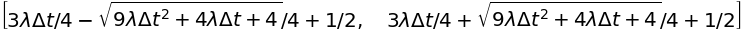

In [4]:
print('Amplification factor for the Adams-bashforth scheme is')
sigmas = solve(eq2,s)
sigmas

The assumptions while calculating the amplification factor are as follow
1. The amplification factor $\sigma$ is constant between all time steps i.e. $\sigma = \frac{w^{n}}{w^{n-1}} = \frac{w^{n+1}}{w^{n}}$
2. The amplification factor is not equal to zero.

Plotting the $\sigma_1$, where $\sigma_1$ is $\frac{3\lambda \Delta t}{4} - \frac{\sqrt{9{\lambda \Delta t}^{2} + 4\lambda \Delta t + 4}}{4} + \frac{1}{2}$

In [ ]:
"""GNUplot Script for plotting 

I = {0,1}
unset para
sigma_Adams1(ldt) = 0.5 + 0.75*ldt - 0.25*(sqrt (9.0*((ldt)**2) + 4.0*ldt + 4.0))
sigma_Adams2(ldt) = 0.5 + 0.75*ldt + 0.25*(sqrt (9.0*((ldt)**2) + 4.0*ldt + 4.0))
set contour
set isosamples 100
set cntrpar levels incremental 0,0.1,1
set view 0,0
set xlabel "real(ldt)"
set ylabel "imag(ldt)"
set title "Stability boundary plot of Adams-bashforth scheme"
set xrange[-5:5]
set yrange[-10:10]
set grid
unset surface
splot abs(sigma_Adams1(x + I*y))
#splot abs(sigma_Adams2(x + I*y))
#set terminal png size 500,500
#set output 'Adams.png'
pause -1 "Hit any key to continue"
"""

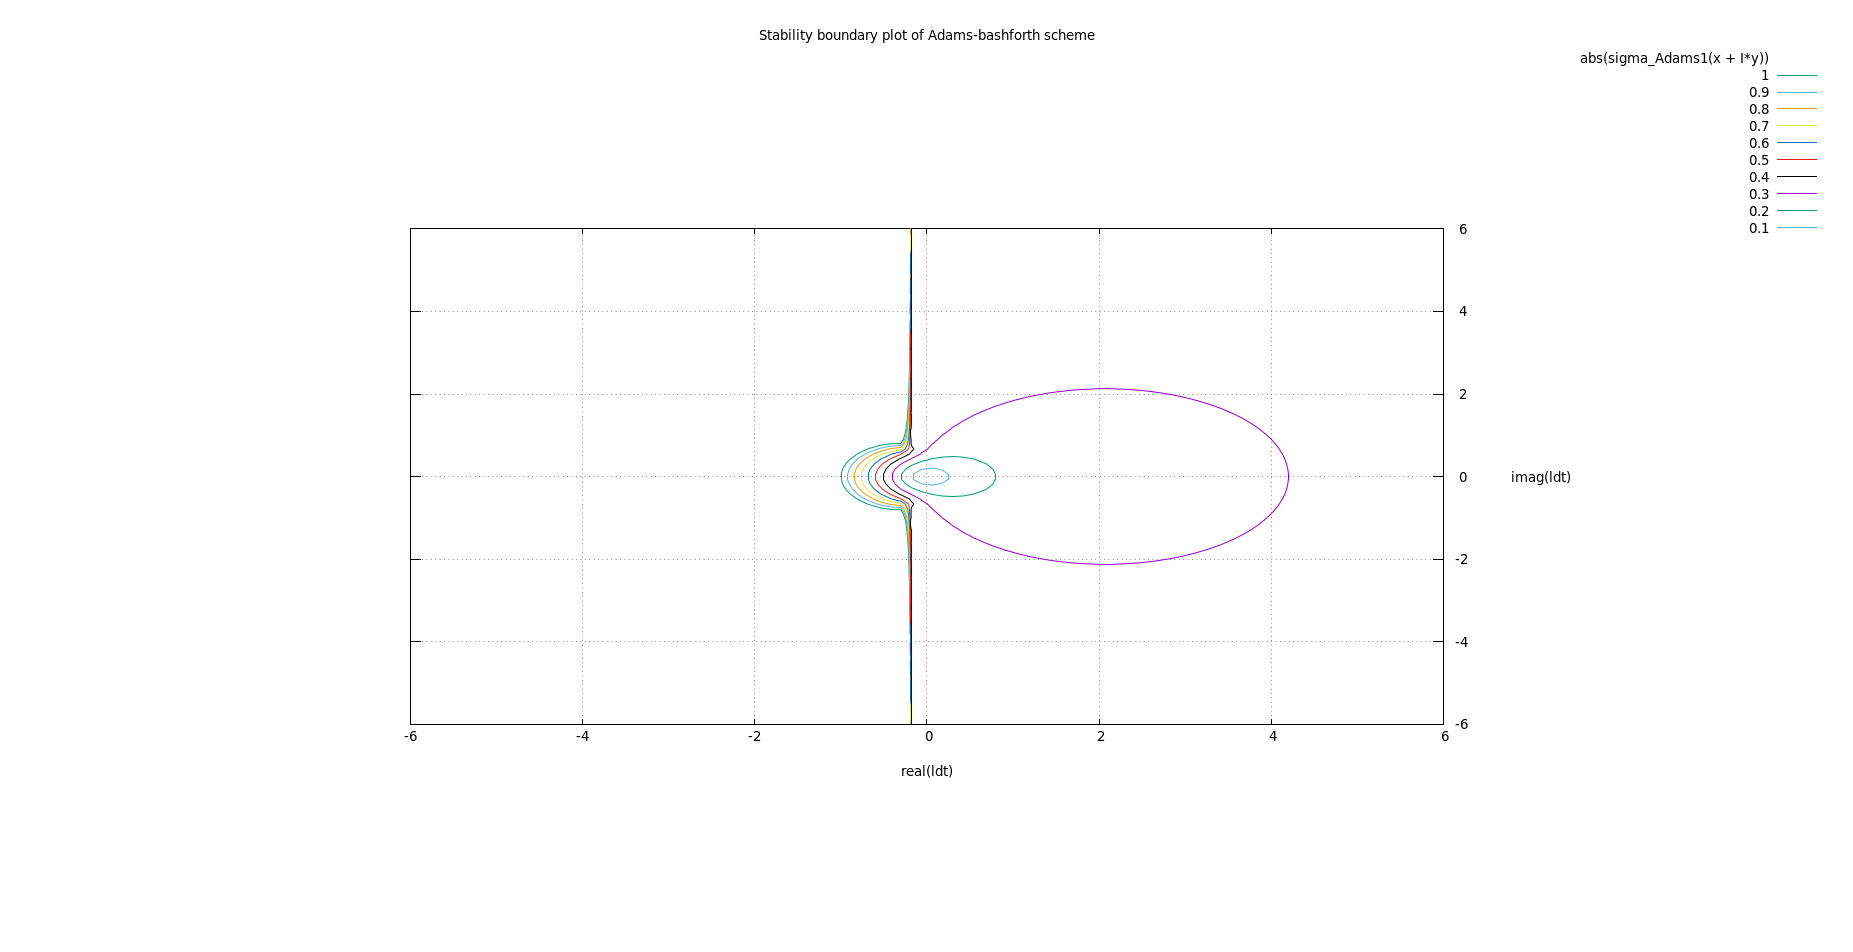

Plotting the $\sigma_2$, where $\sigma_2$ is $\frac{3\lambda \Delta t}{4} + \frac{\sqrt{9{\lambda \Delta t}^{2} + 4\lambda \Delta t + 4}}{4} + \frac{1}{2}$

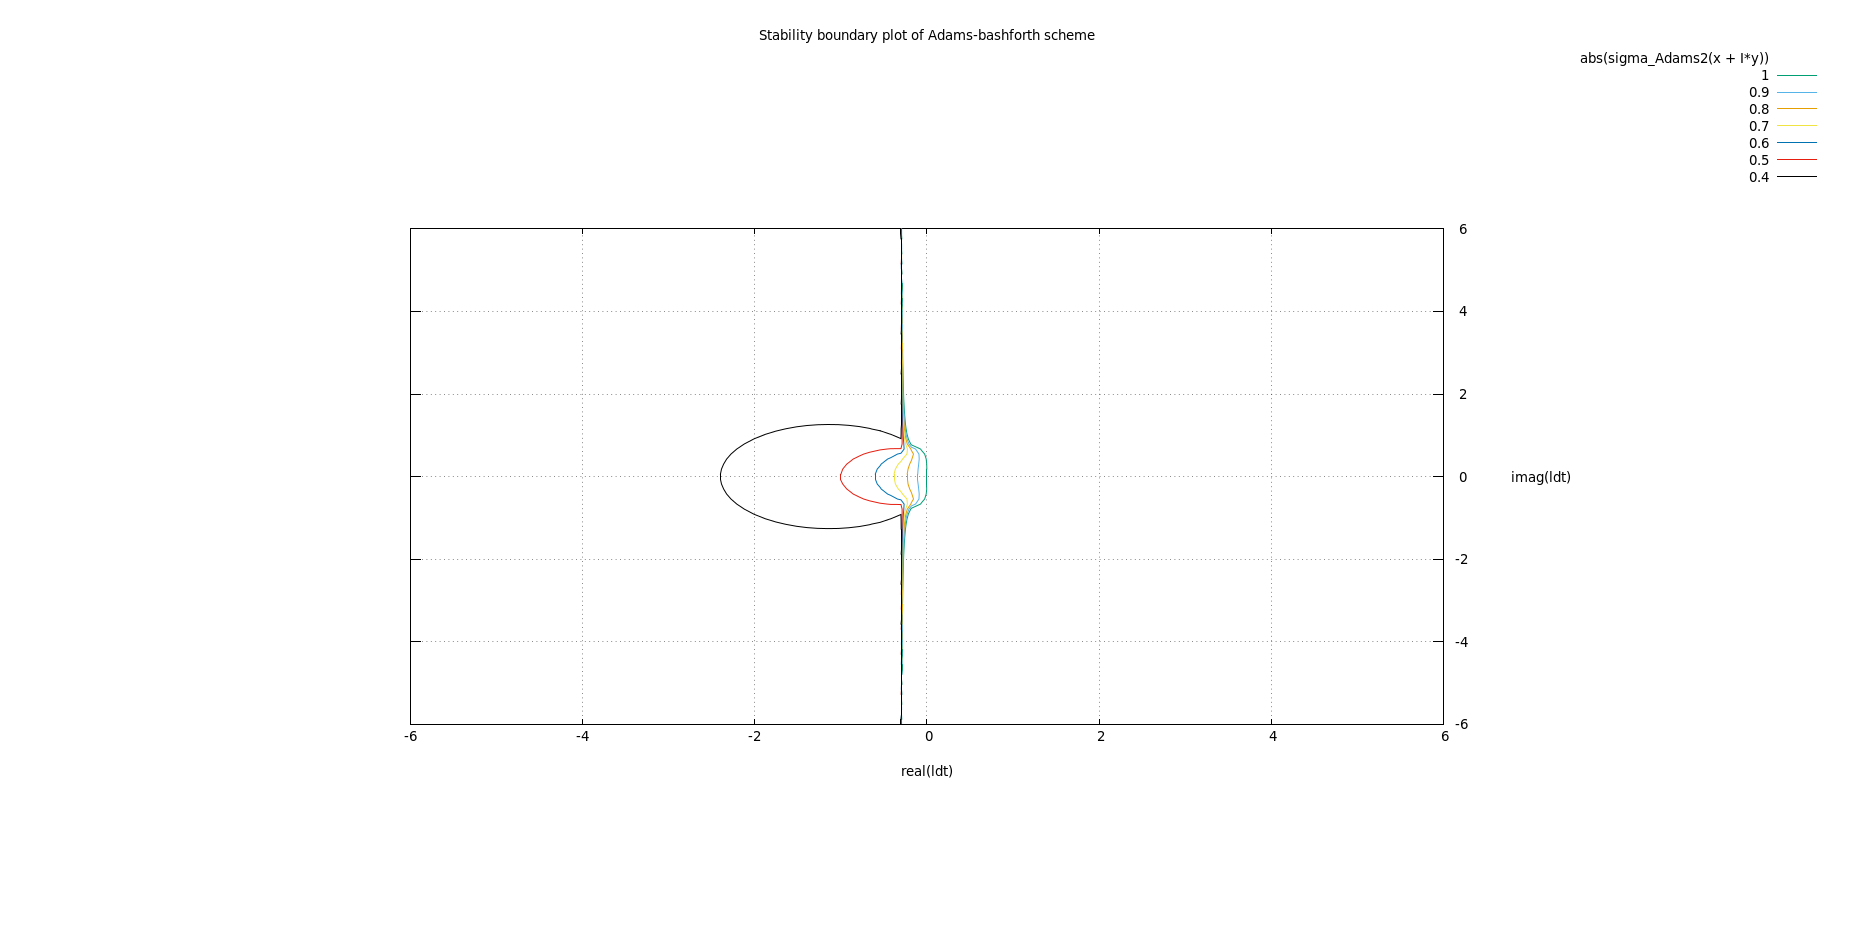

Combine plot of both the roots is<br>

green curve corresponds to -ve root and yellow curve corresponds to +ve root

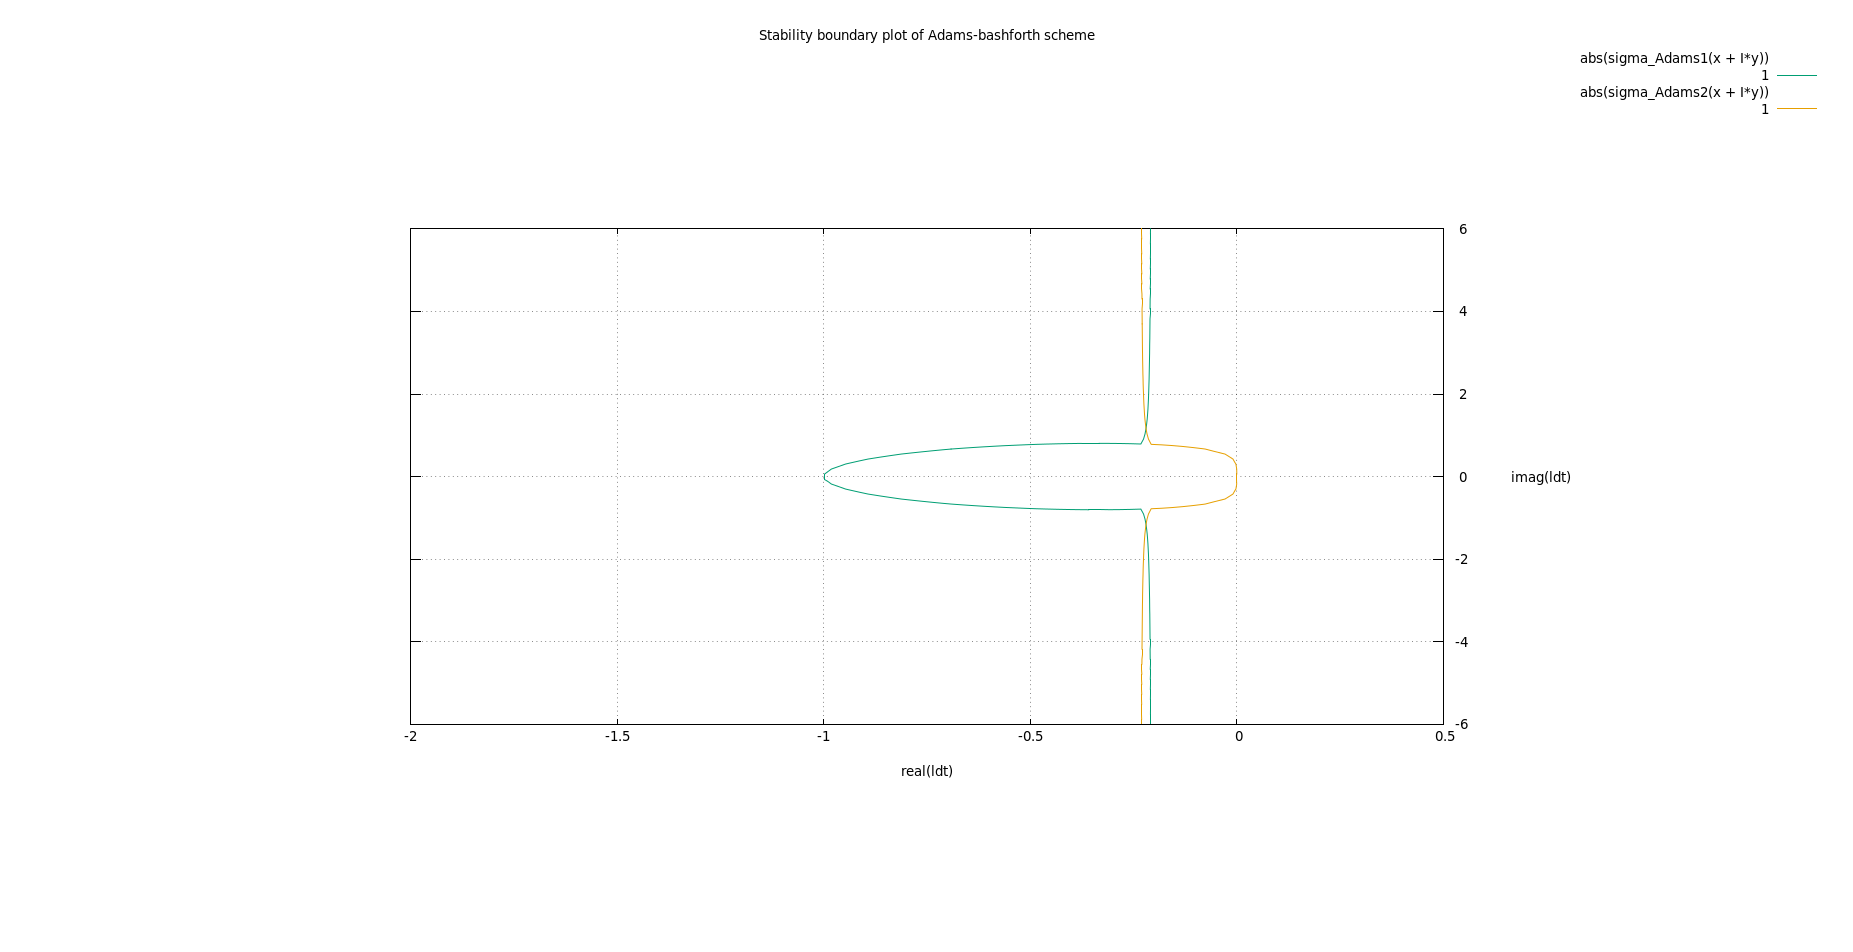

Using the comment from piazza and plotting the max value

In [ ]:
"""
I = {0,1}
max(x, y) = (x > y ? x : y)
unset para
sigma_Adams1(ldt) = 0.5 + 0.75*ldt - 0.25*(sqrt (9.0*((ldt)**2) + 4.0*ldt + 4.0))
sigma_Adams2(ldt) = 0.5 + 0.75*ldt + 0.25*(sqrt (9.0*((ldt)**2) + 4.0*ldt + 4.0))
set contour
set isosamples 100
set cntrpar levels incremental 0,1,1
set view 0,0
set xlabel "real(ldt)"
set ylabel "imag(ldt)"
set title "Stability boundary plot of Adams-bashforth scheme"
set xrange[-2:2]
set yrange[-2:2]
set grid
unset surface
#splot abs(sigma_Adams1(x + I*y))
#splot abs(sigma_Adams1(x + I*y)), abs(sigma_Adams2(x + I*y))
splot max(abs(sigma_Adams1(x + I*y)), abs(sigma_Adams2(x + I*y)))
pause -1 "Hit any key to continue"
"""

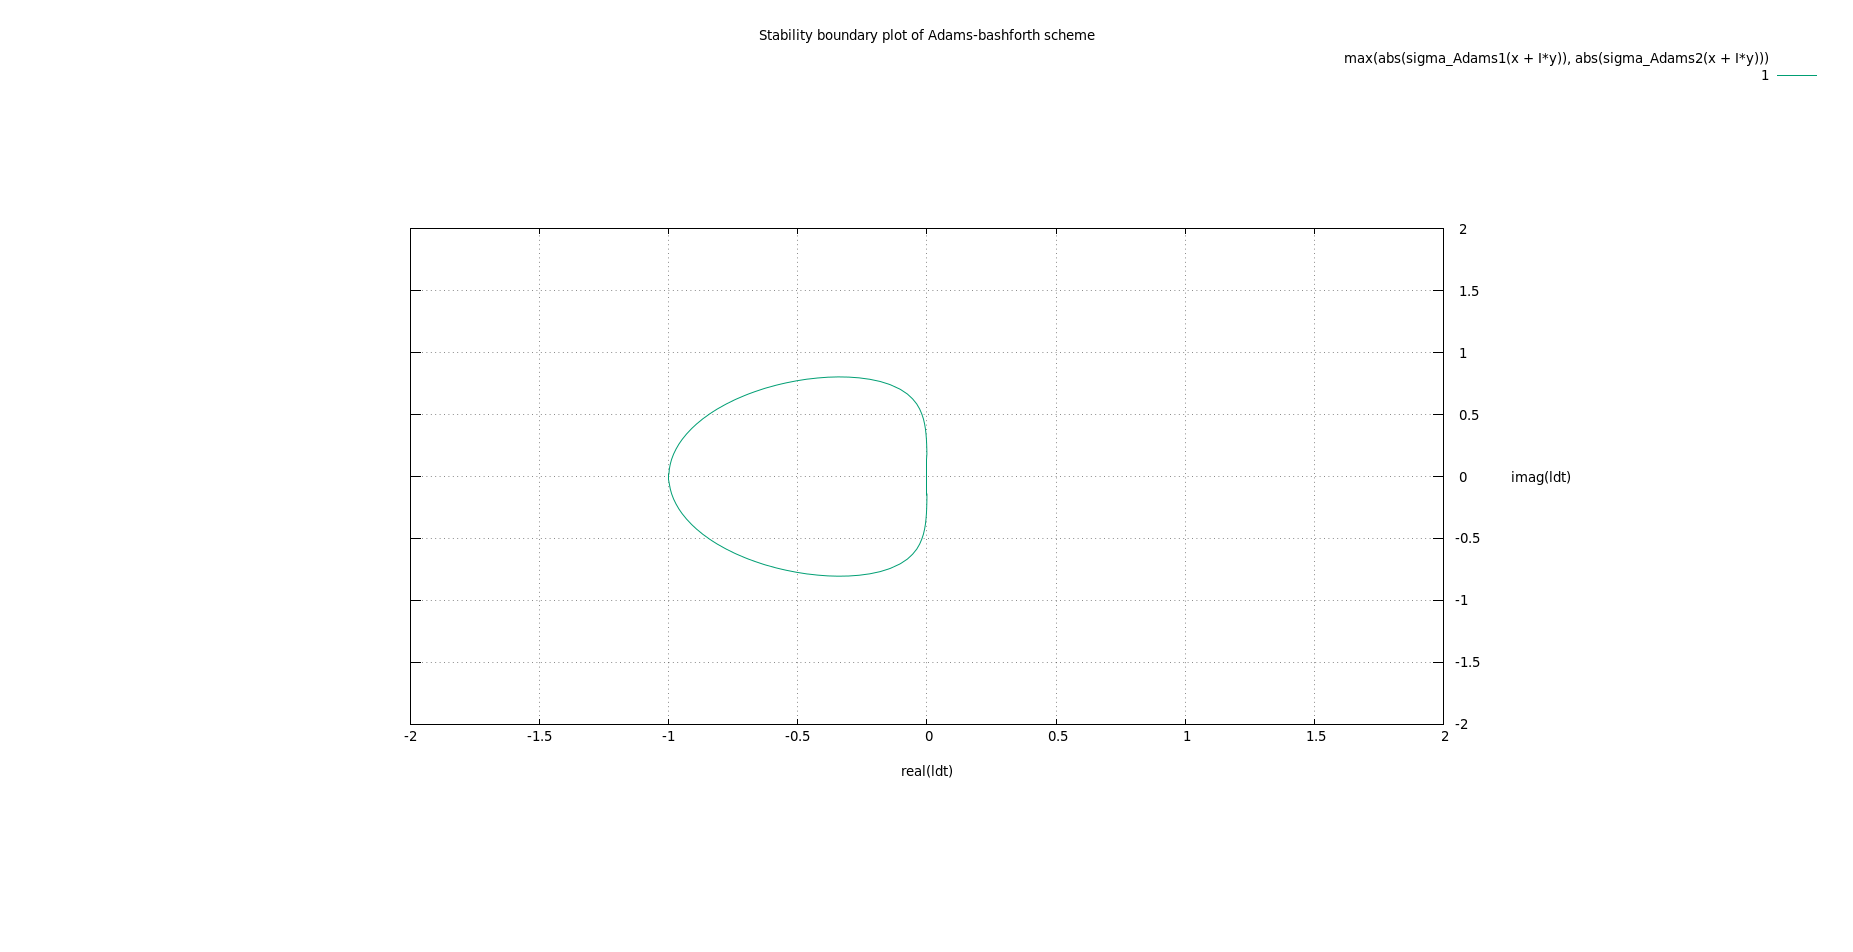

The Stability limit along the real axis is <br>
**-1 to 0**, The value is obtained from the gnuplot graph<br>
The stability limit along the imaginary axis is<br>
is approximately **-0.8 to 0.8**<br>
Checking the non-spurious root.<br>

In [5]:
sigmas[0].subs(ldt,0)

In [6]:
sigmas[1].subs(ldt,0)

since sigmas[0](ldt = 0) is not equal to one, it is spurious root, whereas for sigmas[1](ldt = 0) is equal to 1 hence it is not a spurious root

Taylor Series expansion of the roots

In [7]:
sigma1_taylorSeries=series(sigmas[0],ldt,x0=0,n=4)
sigma1_taylorSeries

In [8]:
sigma2_taylorSeries=series(sigmas[1],ldt,x0=0,n=4)
sigma2_taylorSeries

For the non-spurious root the order of accuracy is **2**. 

In [9]:
from sympy import I
x,y = symbols('x y')


# Problem Number 2 


In [10]:
Tihalf = Symbol('T_{i + 1/2}')
Ti = Symbol(' \overline{ T_i}')
Tip1 = Symbol(' \overline{ T_{i + 1}}')
Tim1 = Symbol(' \overline {T_{i - 1}}')
Tim2 = Symbol(' \overline {T_{i - 2}}')
phi = Symbol('\phi', real= True)
u = Symbol('u', real= True)
dx = Symbol('\Delta x', real= True)
a = Symbol('alpha')



Third order upwind biased flux

In [11]:
UW3BiasedFlux = (2*Tip1 + 5*Ti - Tim1)/6
UW3BiasedFlux

Third order upwind biased flux integral divided by dx


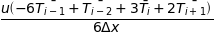

In [12]:
UW3BiasedFluxIntegral = (u/(6*dx))*(2*Tip1 + 3*Ti -6*Tim1 + Tim2)
UW3BiasedFluxIntegral

second order flux for unsteady heat conduction is

In [13]:
flux2c = (Tip1 - Ti)/dx
flux2c

Flux integral with second order flux approximation for unsteady heat conduction equation


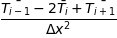

In [14]:
fluxIntegral2c = (Tip1 - 2*Ti + Tim1)/dx**2
fluxIntegral2c

Amplification factor of Rk4 


In [15]:
sigma_RK4 = 1 + (l*dt) + ((l*dt)**2)/2 + ((l*dt)**3)/6 + ((l*dt)**4)/24
sigma_RK4

Eigen vlaues calculation

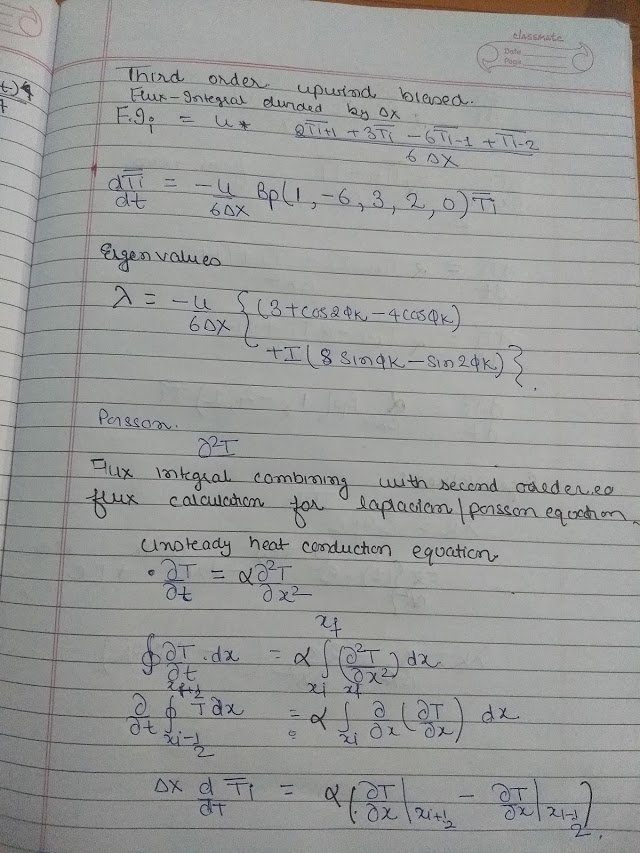

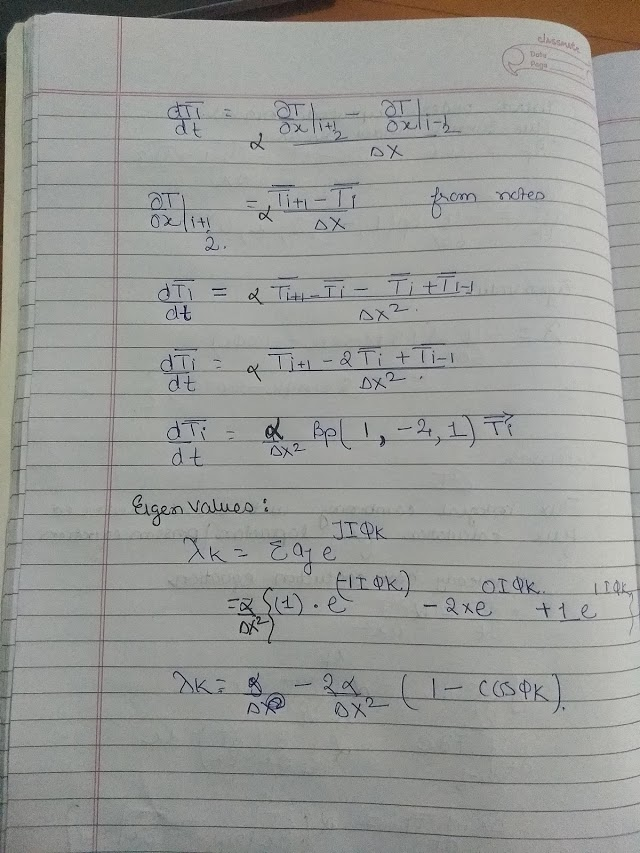

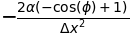

In [16]:
lambda_c2 = ((-2*a)/dx**2)*(1 -cos(phi))
lambda_c2


Eigne values of third order upwind biased discretization

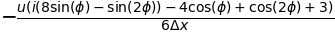

In [17]:
lambda_UW3b = (-u/(6*dx))*((3 + cos(2*phi) -4*cos(phi)) + I*(8*sin(phi) - sin(2*phi)))
lambda_UW3b

Stability Boundary

In [18]:
sigma_RK4_c2 = sigma_RK4.subs(l,lambda_c2)
sigma_RK4_UW3b = sigma_RK4.subs(l, lambda_UW3b)

EQ1 = Eq(Abs(sigma_RK4_c2),1)
EQ2 = Eq(Abs(sigma_RK4_UW3b),1)


In [ ]:
"""
I = {0,1}
set para
sigma_RK4(ldt) = 1 + ldt + ((ldt**2)/2) + (ldt**3)/6  + (ldt**4)/24
lambda_3UWB(phi) = (-1.0/6.0)*( (3 + cos(2*phi) -4*cos(phi)) + I*(8*sin(phi) -sin(2*phi)))
set contour
set isosamples 100
set cntrpar levels incremental 0,0.1,1
set view 0,0
set xlabel "CFL"
set ylabel "phi"
set title "Amp fac for RK4 and 3UWB"
set urange[0:4.0]
set vrange[0:2*pi]
set grid
unset surface
splot u,v,abs(sigma_RK4(lambda_3UWB(v)*u))
pause -1 "Hit any key to continue"
"""

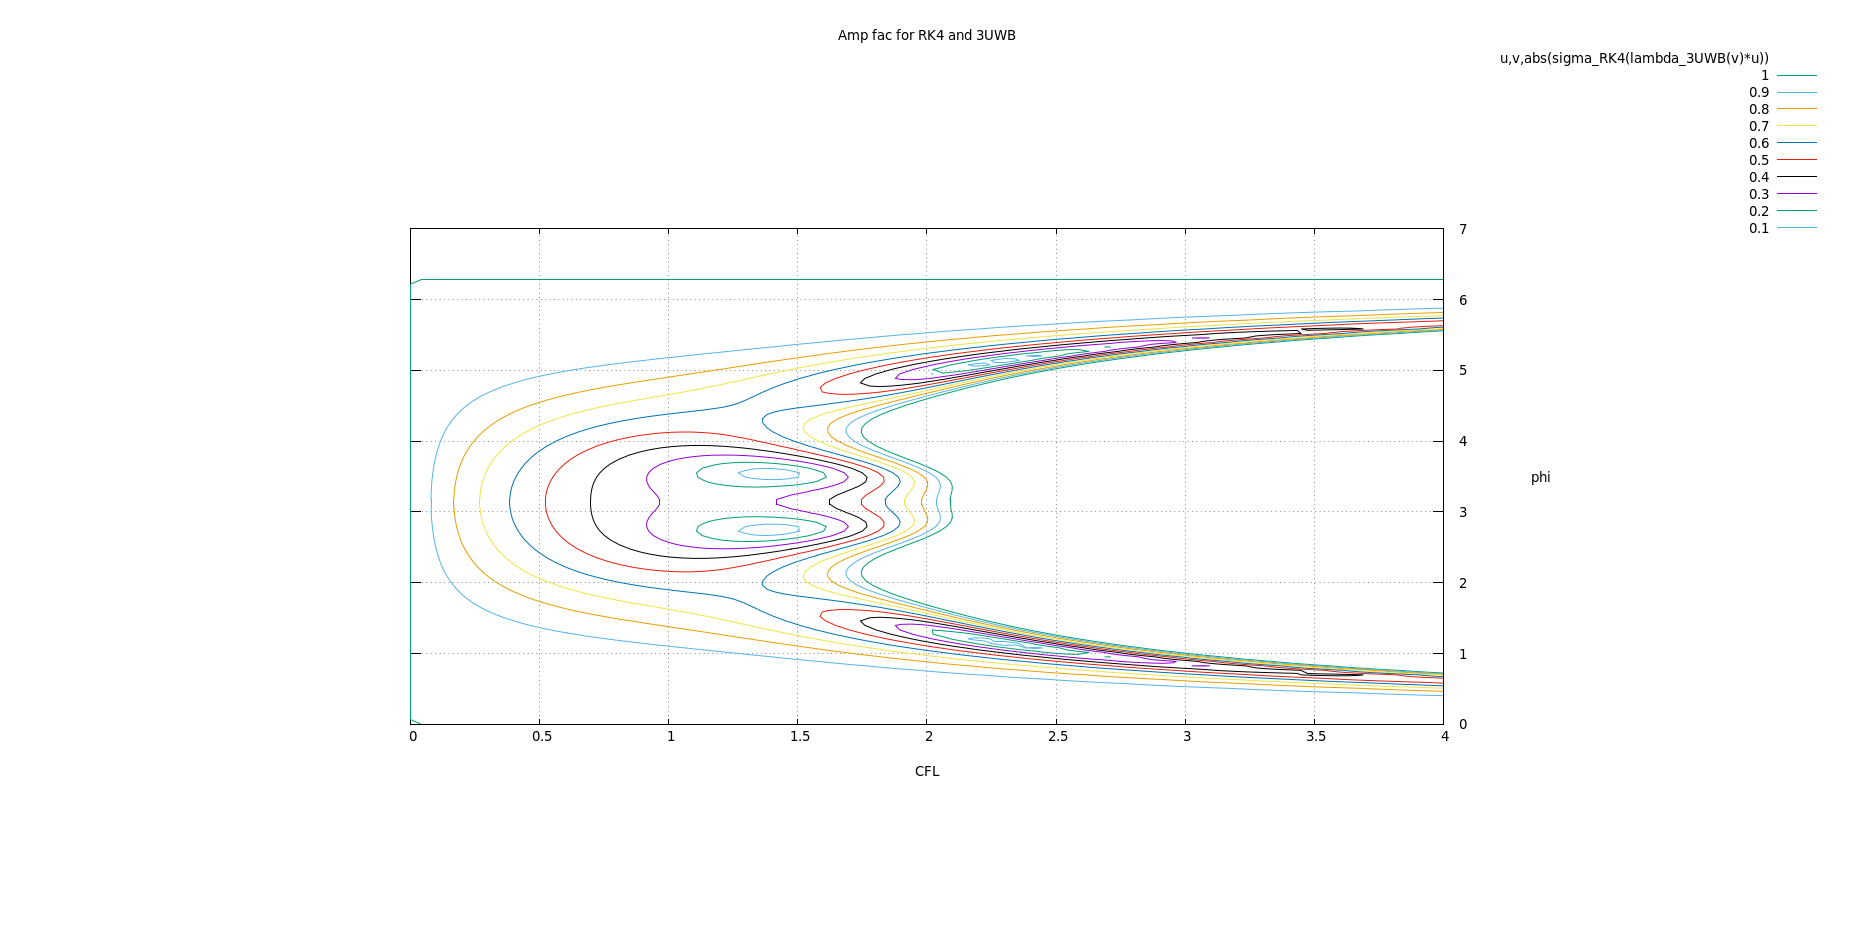

CFL number is approximately **1.1** for which amplification factor for RK4 and 3UWB is 1, hence the maximum possible time step corresponds to this CFL number value

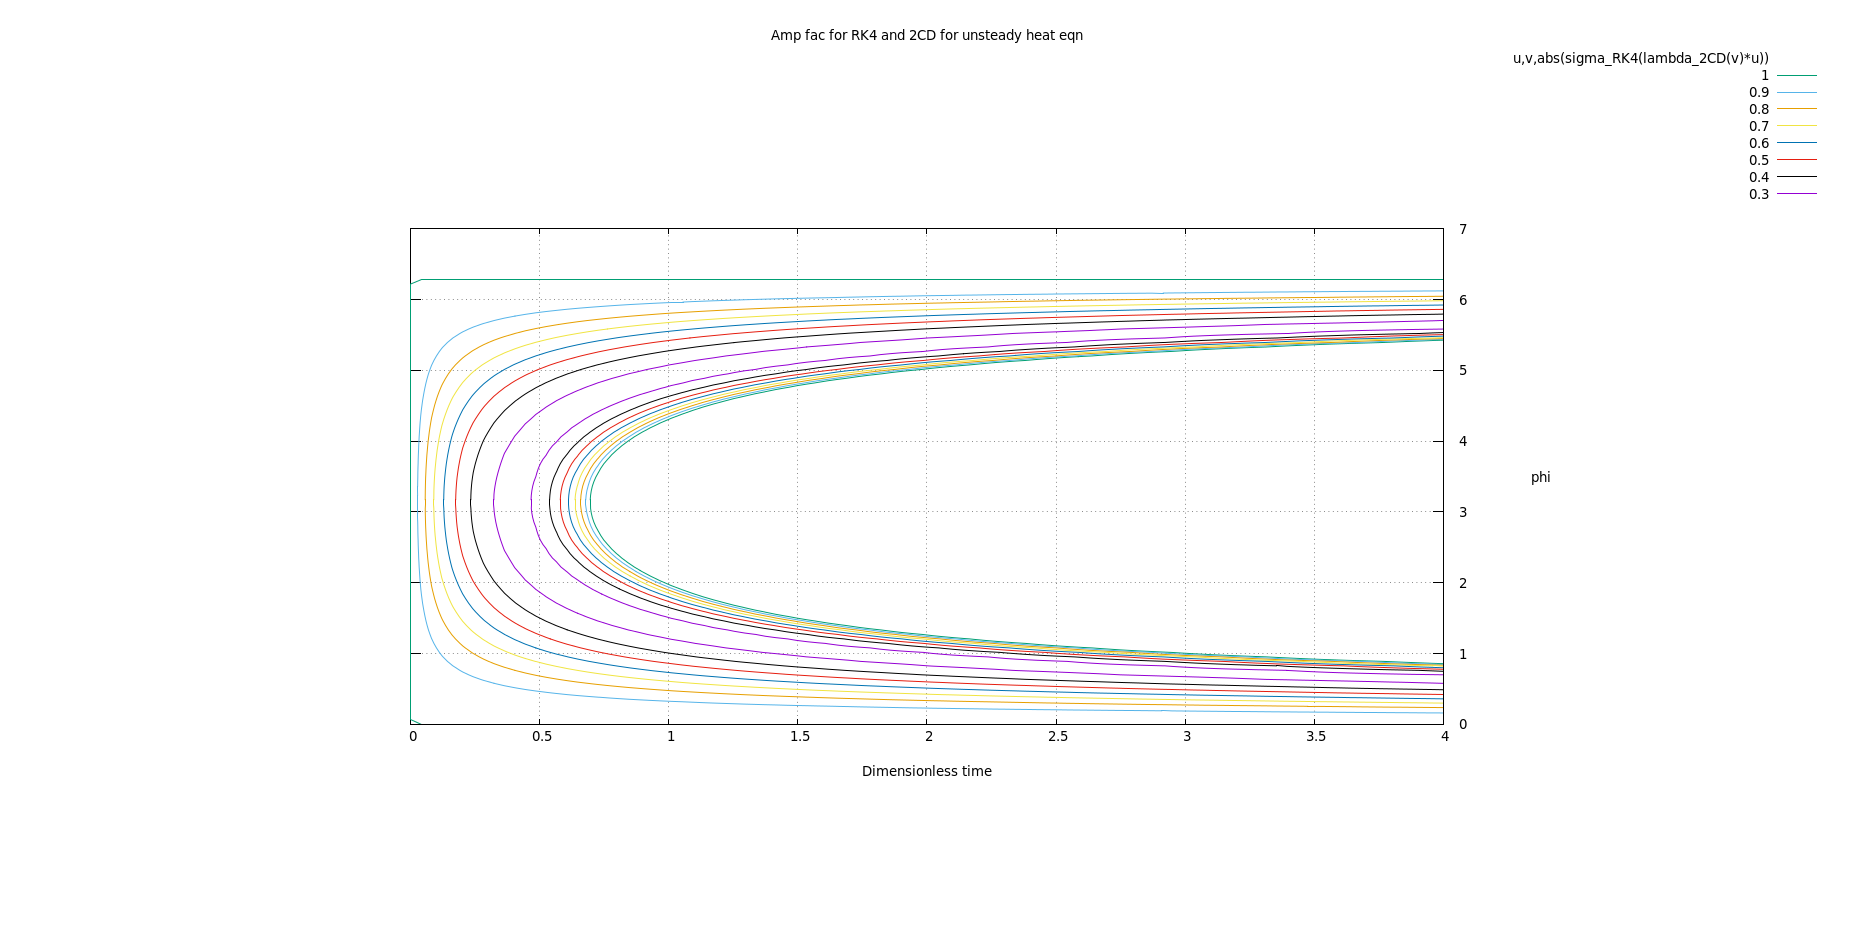

In [ ]:
"""
I = {0,1}
set para
sigma_RK4(ldt) = 1 + ldt + ((ldt**2)/2) + (ldt**3)/6  + (ldt**4)/24
lambda_2CD(phi) = -2.0*(1- cos(phi))
set contour
set isosamples 100
set cntrpar levels incremental 0,0.1,1
set view 0,0
set xlabel "Dimensionless time"
set ylabel "phi"
set title "Amp fac for RK4 and 2CD for unsteady heat eqn"
set urange[0:4.0]
set vrange[0:2*pi]
set grid
unset surface
splot u,v,abs(sigma_RK4(lambda_2CD(v)*u))
pause -1 "Hit any key to continue"
"""

Maximum possible dimensionless time for Rk4 and 2 CD for Unsteady heat equation is approximately **0.7**

# Problem Number 3

In [19]:
a1 = Symbol('alpha_1')
a2 = Symbol('alpha_2') 
a3 = Symbol('alpha_3')


In [26]:
w1 = wn + a1*l*dt*wn
w1

In [28]:
w2 = wn + a2*l*dt*w1
w2

In [27]:
eq = Eq(wnp1,wn + a3*l*dt*w2)
eq

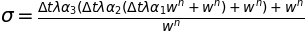

In [21]:
eq = Eq(eq.lhs/wn,eq.rhs/wn)
eq = eq.subs(wnp1/wn,s)
eq

**Amplification Factor For the Scheme is**

In [25]:
eq1 = eq.simplify()
eq2 = eq1.expand()
eq2

### Condition for which scheme is at least first order is **$\alpha_3 = 1$**

In [ ]:
"""
I = {0,1}
set para
a1 = 1
a2 = 1
a3 = 1
sigma_3Step(ldt) = 1 + a3*ldt + a3*a2*((ldt**2)/2) + a1*a2*a3*((ldt**3)/6)
lambda_2UW(phi) = (0.5)*( (4*cos(phi) - cos(2*phi) - 3) + I*(sin(2*phi)-sin(phi)) )
set contour
set isosamples 100
set cntrpar levels incremental 0,0.5,10
#set view 0,0
set xlabel "CFL"
set ylabel "phi"
set title "Amp fac for 3 Step method and 2UW"
set urange[0:4.0]
set vrange[pi/2:pi]
set grid
sset surface
splot u,v,abs(sigma_3Step(lambda_2UW(v)*u))
pause -1 "Hit any key to continue"
"""

### Optimising for the alphas 

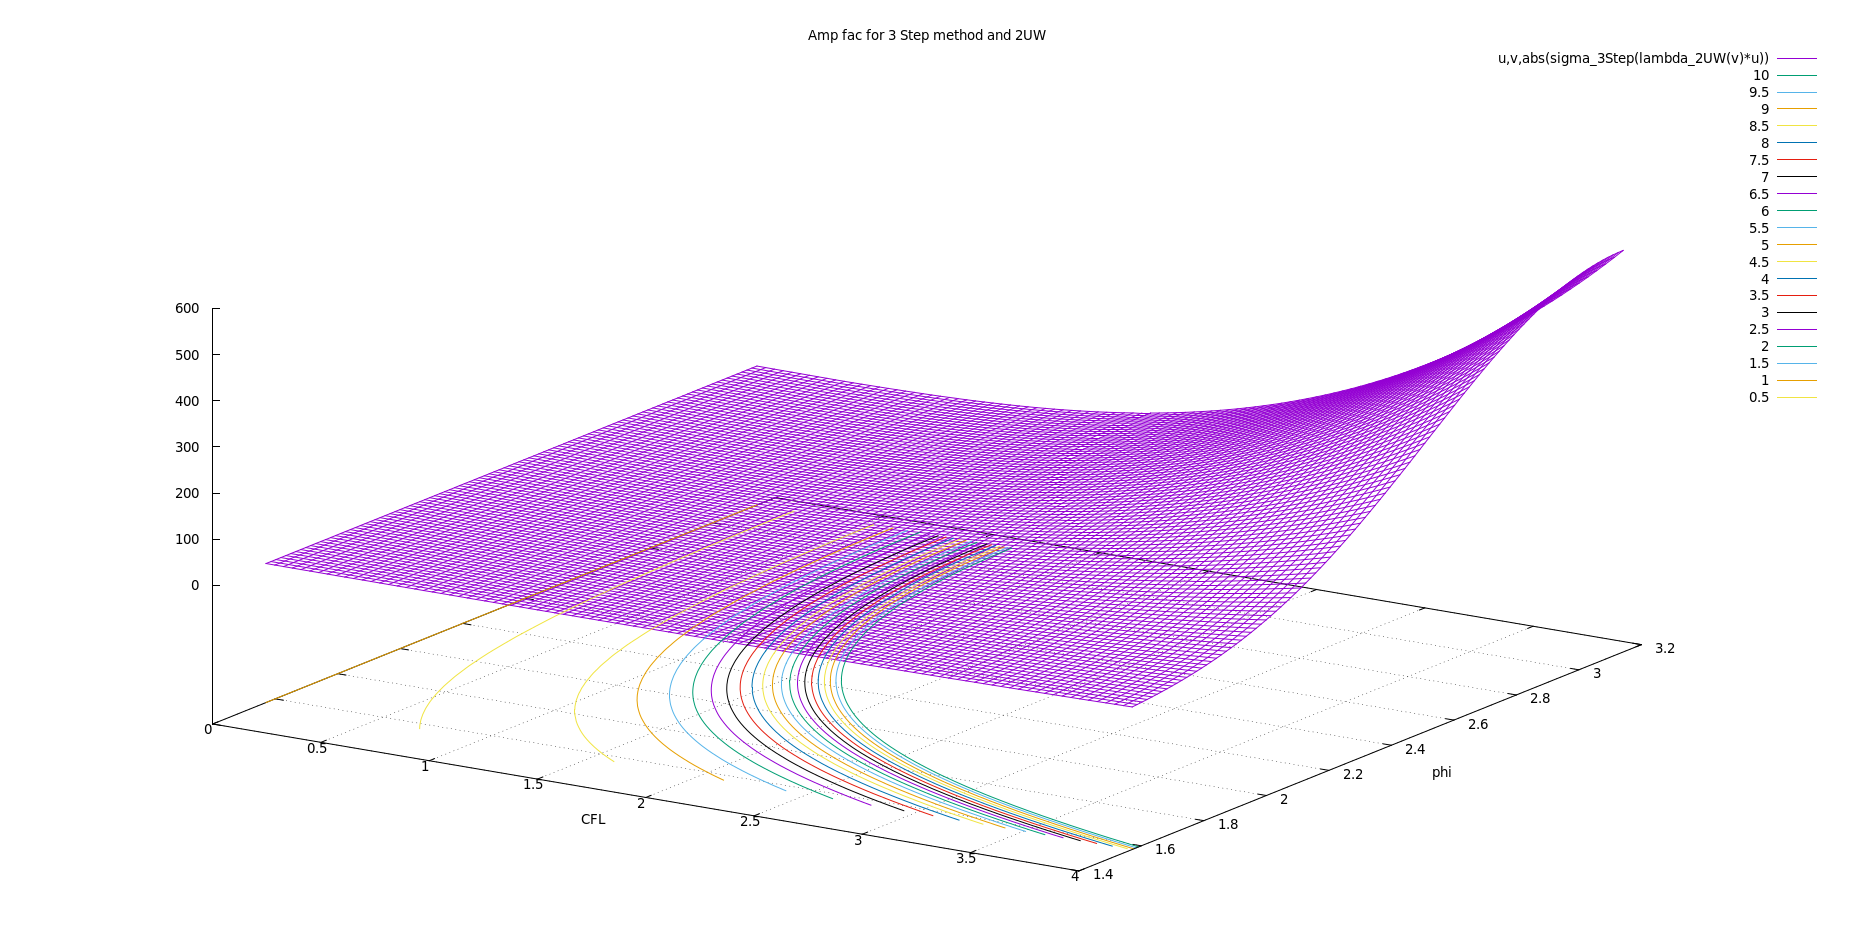

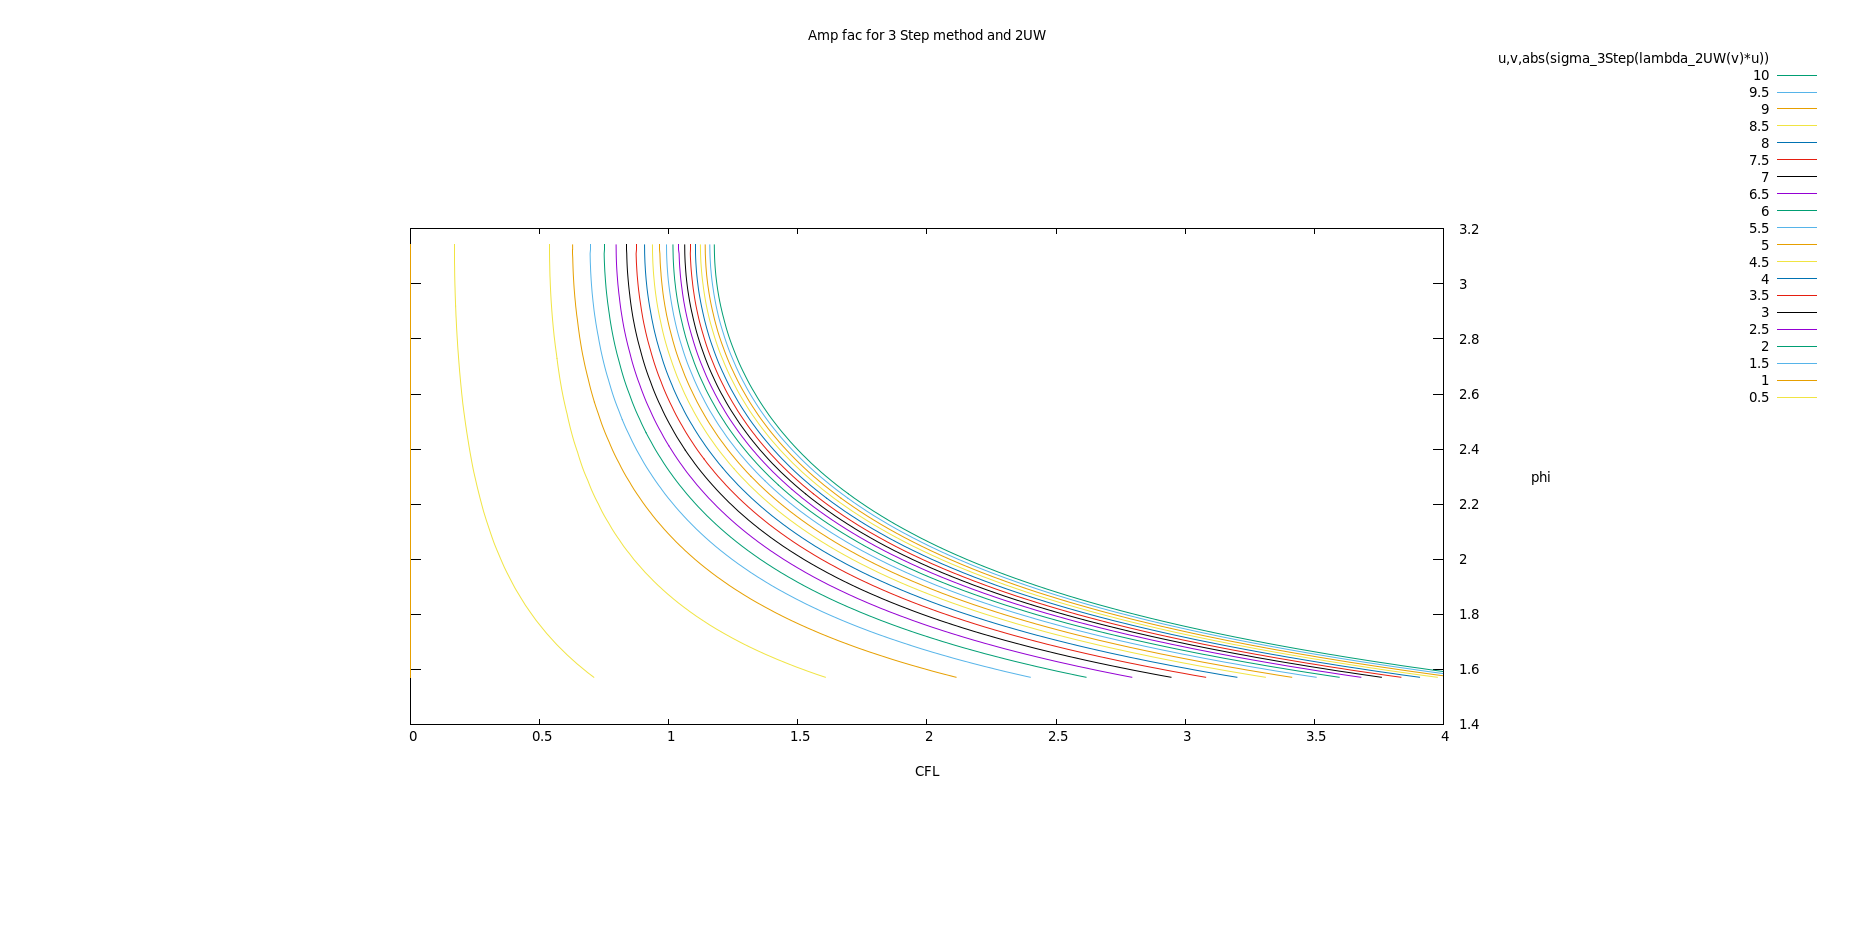

In [29]:
a1 = a2 = a3 = 1